In [ ]:
# Hypothesis testing: 2-Sample t-test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind

In [6]:
#Created an an experiment with two versions of a webpage. The metric you compare is the session time each user stays on the page.

#If the confidence level is 90%, is there a statistically significant difference between the two pages?


In [4]:
# session_times.csv
url = 'https://drive.google.com/file/d/1nYRMCgv3OKaiIUDBPgq-EnE2sWhgrJI3/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
session_times = pd.read_csv(path)

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [5]:
session_times.Page.value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

In [7]:
#Find the observed difference between the mean session time fo the two pages.

In [9]:
page_a = session_times.loc[session_times["Page"]=="Page A", "Time"]
page_a_mean = page_a.mean()
page_a_mean

page_b = session_times.loc[session_times["Page"]=="Page B", "Time"]
page_b_mean = page_b.mean()
page_b_mean

mean_diff = abs(page_a_mean-page_b_mean)
mean_diff

35.66666666666667

In [11]:
print("Mean in B:", round(np.mean(page_b),))

Mean in B: 162


In [12]:
print("Mean in A:", round(np.mean(page_a),))

Mean in A: 126


In [10]:
#Establish the Null and the Alternative Hypotheses.

Null Hypothesis ( 𝐻0 ): mean session time on Page A = mean session time on Page B

Alternative Hypothesis ( 𝐻𝐴 ): mean session time on Page A != mean session time on Page B

In [15]:
#Define and interpret alpha.
0.1

0.1

In [16]:
#Filter the dataframe session_times so that you can have two Pandas Series with the session times for Paga A and Page B.

In [17]:
page_a
page_b

1     253.0
3      71.0
5      85.0
7     246.0
9     149.0
11     75.0
13    333.0
15    187.0
17    126.0
19     48.0
21    147.0
23    357.0
25    223.0
27     43.0
29     87.0
Name: Time, dtype: float64

In [ ]:
#Use Scipy to find the p-value.

In [18]:
tscore, pvalue = ttest_ind(a = page_a, b = page_b, alternative='two-sided')

In [19]:
pvalue

0.2690102436392606

In [ ]:
#State the result of the experiment and the interpretation of the p-value.

/Users/simgesargin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


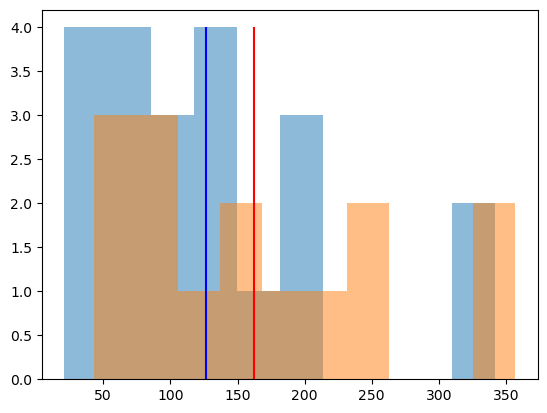

In [20]:
page_a_df=session_times.loc[session_times["Page"]=="Page A", ["Time"]]
page_b_df=session_times.loc[session_times["Page"]=="Page B", ["Time"]]
ypa, xpa, _ = plt.hist(page_a_df, bins=10, alpha=0.5, label="Page A")
ypb, xpb, _ = plt.hist(page_b_df, bins=10, alpha=0.5, label="Page B")
plt.vlines(np.mean(page_a_df), ymin=0, ymax=max(max(ypa), max(ypb)), color="blue", label="Mean Page A")
plt.vlines(np.mean(page_b_df), ymin=0, ymax=max(max(ypa), max(ypb)), color="red", label="Mean Page B")
plt.show()